In [2]:
import pandas as pd  

b = pd.read_csv('data/chick002.csv') # b 변수에 데이터셋 입력
b

,chick_nm,weight
0,b01,37
1,b02,39
2,b03,41
3,b04,45
4,b05,37
5,b06,33
6,b07,34
7,b08,31
8,b09,40
9,b10,41


In [3]:
b.head()

,chick_nm,weight
0,b01,37
1,b02,39
2,b03,41
3,b04,45
4,b05,37


In [4]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chick_nm  30 non-null     object
 1   weight    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [5]:
###  기초 통계량 확인
b.describe()

,weight
count,30.000000
mean,38.400000
std,3.286335
min,31.000000
25%,36.250000
50%,39.000000
75%,40.750000
max,45.000000


In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')     # 한글처리
plt.rcParams['axes.unicode_minus']=False   # '-'표시 처리

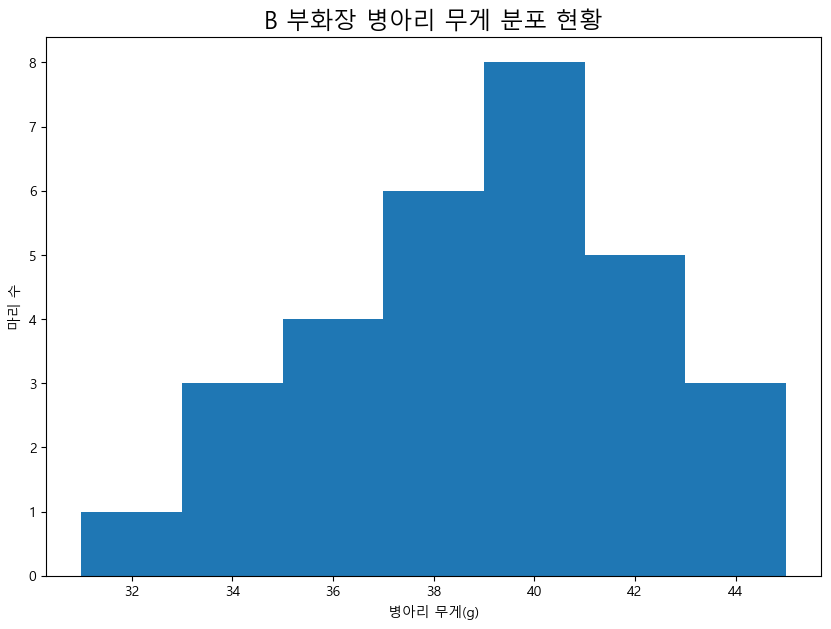

In [7]:
# 히스토그램 그리기
plt.figure(figsize=(10, 7))
plt.hist(b.weight, bins = 7)
plt.title('B 부화장 병아리 무게 분포 현황', fontsize =17)
plt.xlabel('병아리 무게(g)')
plt.ylabel('마리 수')
plt.show()

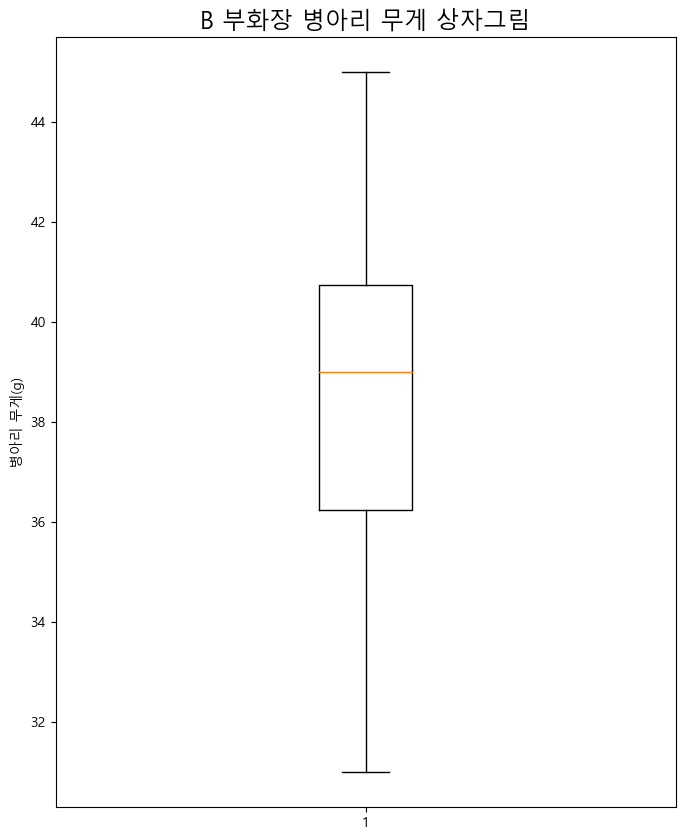

In [8]:
# 상자그림으로 분포 확인하기
plt.figure(figsize=(8, 10))
plt.boxplot(b.weight)
plt.title('B 부화장 병아리 무게 상자그림', fontsize =17)
plt.ylabel('병아리 무게(g)')
plt.show()

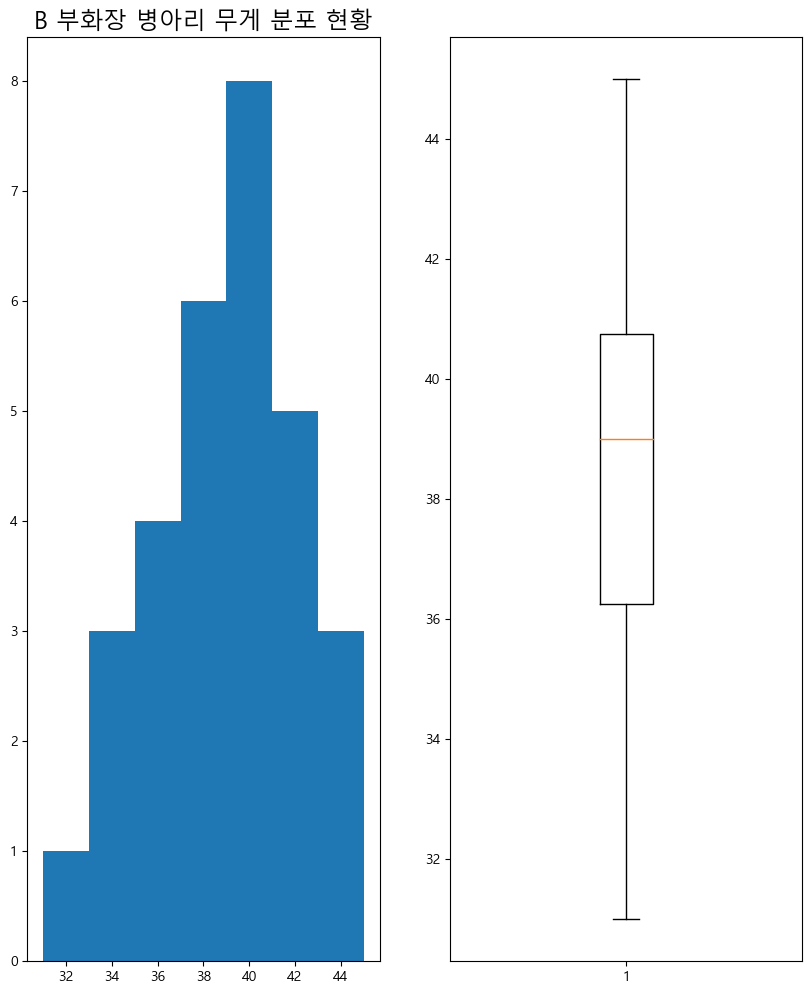

In [12]:
# 히스토그램과 상자그림 한 번에 표시
plt.figure(figsize=(10, 12))
plt.subplot(1,2, 1)
plt.hist(b.weight, bins = 7)
plt.title('B 부화장 병아리 무게 분포 현황', fontsize = 17)
plt.subplot(1,2, 2)
plt.boxplot(b.weight)#, vert = False)
plt.show()


### 사료 제조사별 성능차이가 있을까? (가설검정_t-test)

###### 1. 데이터 불러오기

In [14]:
import pandas as pd

test = pd.read_csv('data/chick003.csv') # test 변수에 데이터셋 입력
test

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116
5,A,a17,118
6,A,a26,110
7,A,a28,112
8,A,a29,106
9,A,a30,108


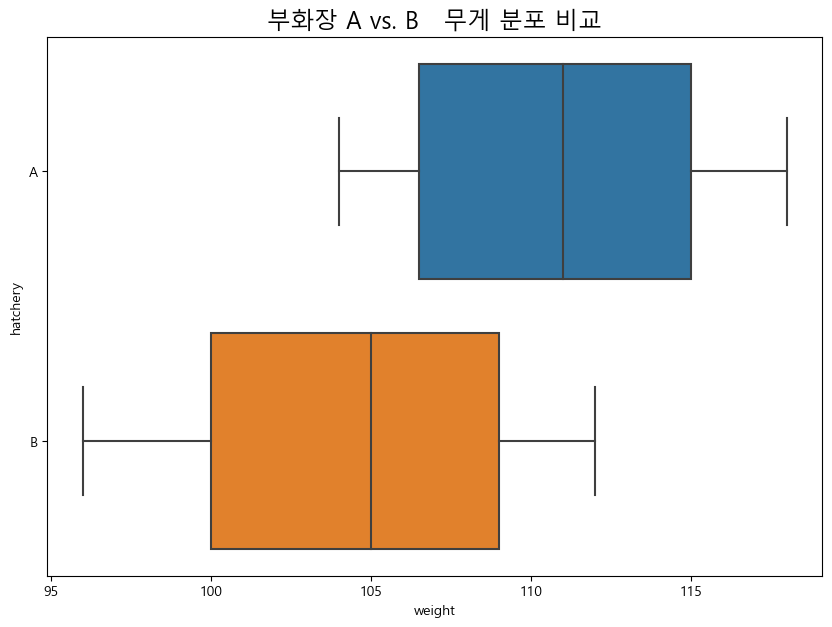

In [15]:
# seaborn 패키지 이용 그룹별 상자그림 그리기
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(x = 'weight', y = 'hatchery', data= test)
plt.title('부화장 A vs. B   무게 분포 비교', fontsize = 17)
plt.show()

###### 2. t-test (귀무가설 : 두 집단의 평균은 같다)

In [16]:
## 가설검정을 위해 scipy 패키지

import scipy as sp

In [17]:
# 부화장 A만 별도로 데이터셋 구성
test_a = test.loc[test.hatchery == 'A', 'weight']
test_a

0    112
1    116
2    106
3    104
4    116
5    118
6    110
7    112
8    106
9    108
Name: weight, dtype: int64

In [18]:
# 부화장 B만 별도로 데이터셋 구성
test_b = test.loc[test.hatchery == 'B', 'weight']
test_b

10    100
11    110
12     98
13    100
14    104
15    112
16    106
17    106
18     96
19    110
Name: weight, dtype: int64

In [19]:
# 부화장 A 샤피로 윌크 검정 실시
sp.stats.shapiro(test_a)

ShapiroResult(statistic=0.9400018453598022, pvalue=0.5530338883399963)

In [20]:
# 부화장 B 샤피로 윌크 검정 실시
sp.stats.shapiro(test_b)

# → p값이 0.543으로 유의수준 0.05보다 크기 때문에 귀무가설 채택(정규분포 OK)

ShapiroResult(statistic=0.9390683770179749, pvalue=0.5426943302154541)

In [22]:
# 부화장 A, B 두 집단 간 평균 검정 (귀무가설 : 두 집단의 평균은 같다)
sp.stats.ttest_ind(test_a, test_b)

# → p값이 0.01로 0.05보다 작기 때문에 95% 신뢰수준에서 귀무가설 기각 (대립가설 채택),
# 즉, 두 집단 간 평균은 서로 다르다고 판단됨

Ttest_indResult(statistic=2.842528280230058, pvalue=0.010803990633924202)

### 문제

In [24]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


###### 1. iris 데이터 셋의 구조(structure)와 변수의 자료형(type)을 확인해 보세요. 

######  몇 개의 열과 행으로 이루어져 있는지, 각 열은 어떤 형태를 갖추고 있는지 코드를 작성해 보세요.

###### 2. iris 데이터 셋의 처음부터 10개 행을 불러와 보세요.

###### 3. sepal_width(꽃받침 너비) 열의 데이터 평균과 표준편차 그리고 3사분위수를 구해보세요.

###### 사분위수 (quantile)

###### 4. sepal_width 열의 데이터 분포를 히스토그램으로 나타내 보세요.

###### 5. 상자그림을 이용해 붓꽃 품종별(species) sepal_width의 분포를 나타내 보세요.

###### 6. setosa 품종의 sepal_width만 필터링해서 s라는 데이터 셋을 만들고, versicolor 품종의 sepal_width만 필터링해서 v라는 데이터 셋을 만들어보세요.

###### 7. s와 v가 정규 분포를 따르는지 검정해보세요.

###### 8. 데이터 셋 s와 v의 평균이 같다고 볼 수 있는지 t-test를 통해 검정해보세요.